# **1. Importing Libraries & Datsets**

In [215]:
# Load All Libbus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [216]:
# Load All Dss
dataframe_hinthi = pd.read_csv("hindi_data.csv")
dataframe_lassi = pd.read_csv("punjabi_lexicon.csv")
dataframe_dhokla = pd.read_csv("gujarati_data.csv")
dataframe_vadapav = pd.read_csv("final_marathi_data.csv")

# **2. Data Exploration**

In [217]:
print("Hindi Language Dataset:-")
dataframe_hinthi

Hindi Language Dataset:-


,Sentence,Score
0,ही,-1
1,प्राचीन,-1
2,प्रकार,-1
3,जाती,-1
4,शक,-1
...,...,...
3636,credible,1
3637,balanced,1
3638,affirm,1
3639,advantages,1


In [218]:
dataframe_hinthi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  3641 non-null   object
 1   Score     3641 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.0+ KB


In [219]:
print("Punjabi Language Dataset:-")
dataframe_lassi

Punjabi Language Dataset:-


,Word,Positive Score,Negative Score
0,ਅਪ੍ਰਤੱਖ,0.125,0.625
1,ਤੰਗਲ,0.000,0.000
2,ਸਿਲਾਈ,0.000,0.000
3,ਸੁਹਣੇ,0.750,0.000
4,ਵਿਨਾਸ਼ੀ,0.000,0.750
...,...,...,...
19005,ਬੁਸਕ,0.000,0.125
19006,ਸੈਂਟੀਗ੍ਰੇਡ,0.000,0.000
19007,ਸਦੀਵੀ,0.000,0.000
19008,ਚੋਚਲਾ,0.625,0.375


In [220]:
dataframe_lassi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19010 entries, 0 to 19009
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Word            19010 non-null  object 
 1   Positive Score  19010 non-null  float64
 2   Negative Score  19010 non-null  float64
dtypes: float64(2), object(1)
memory usage: 445.7+ KB


In [221]:
print("Marathi Language Dataset:-")
dataframe_vadapav

Marathi Language Dataset:-


,Sentence,Score
0,चा फक्त नारा देऊन उपयोग नाही महिला अत्याचाराच्...,1
1,पेट्रोल आणि डिझेलवर एक रूपया अधिभार लावल्याने ...,-1
2,लूट झूट का राज भागावो रोजगार और विकास लावो हा ...,1
3,महाराष्ट्र विकास आघाडी सरकारच्या मंत्रिमंडळ वि...,1
4,पिंपरीत अ‍ॅथलेटिक्स आणि विविध क्षेत्रांतल्या ख...,1
...,...,...
15159,मग काय नाचू तुझ्यासाठी,0
15160,जा आणि जेवण घेऊन ये,0
15161,हो तुझ्यासाठी एकदम भारी जेवण आणतो,1
15162,तू फक्त चिडू नकोस,0


In [222]:
dataframe_vadapav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15164 entries, 0 to 15163
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  15164 non-null  object
 1   Score     15164 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.1+ KB


In [223]:
print("Gujrati Language Dataset:-")
dataframe_dhokla

Gujrati Language Dataset:-


,Sentence,Score,Stopword
0,"એક ખૂબ જ, ખૂબ, ખૂબ જ ધીમી ગતિએ ચાલતી, વ્યથિત, ...",0,હે
1,ખાતરી નથી કે કોણ વધુ ખોવાઈ ગયું - ફ્લેટ પાત્રો...,0,છુ
2,બ્લેક એન્ડ વ્હાઇટ અને ચપળ કેમેરા એંગલ સાથે કલા...,0,છું
3,ખૂબ જ ઓછું સંગીત અથવા બોલવા માટે કંઈપણ,0,છે
4,મૂવીનો શ્રેષ્ઠ સીન ત્યારે હતો જ્યારે ગેરાર્ડો ...,1,કે
...,...,...,...
2882,હુમલાખોર,0,NaN
2883,હુમલો,0,NaN
2884,હેક,0,NaN
2885,હેરાન,0,NaN


In [224]:
dataframe_dhokla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2887 non-null   object
 1   Score     2887 non-null   int64 
 2   Stopword  122 non-null    object
dtypes: int64(1), object(2)
memory usage: 67.8+ KB


# **3. ML Model (RFC)**

In [225]:
# defineing TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [226]:
# converting text dataframe into numerical features
X_hindi = tfidf_vectorizer.fit_transform(dataframe_hinthi['Sentence'])
X_punjabi = tfidf_vectorizer.transform(dataframe_lassi['Word'])
X_gujrati = tfidf_vectorizer.transform(dataframe_dhokla['Sentence'])
X_marathi = tfidf_vectorizer.transform(dataframe_vadapav['Sentence'])

In [227]:
# target variables
y_hindi = dataframe_hinthi['Score']
y_punjabi = (dataframe_lassi['Positive Score'] > dataframe_lassi['Negative Score']).astype(int)
y_gujrati = dataframe_dhokla['Score']
y_marathi = dataframe_vadapav['Score']

In [228]:
# spliting in ts & ts
X_hindi_train, X_hindi_test, y_hindi_train, y_hindi_test = train_test_split(X_hindi, y_hindi, test_size=0.2, random_state=42)
X_marathi_train, X_marathi_test, y_marathi_train, y_marathi_test = train_test_split(X_marathi, y_marathi, test_size=0.2, random_state=42)
X_gujrati_train, X_gujrati_test, y_gujrati_train, y_gujrati_test = train_test_split(X_gujrati, y_gujrati, test_size=0.2, random_state=42)
X_punjabi_train, X_punjabi_test, y_punjabi_train, y_punjabi_test = train_test_split(X_punjabi, y_punjabi, test_size=0.2, random_state=42)

In [229]:
# train the Random Forest Classifier
model_hindi = RandomForestClassifier()
model_hindi.fit(X_hindi_train, y_hindi_train)

RandomForestClassifier()

In [230]:
model_marathi = RandomForestClassifier()
model_marathi.fit(X_marathi_train, y_marathi_train)

RandomForestClassifier()

In [231]:
model_gujrati = RandomForestClassifier()
model_gujrati.fit(X_gujrati_train, y_gujrati_train)

RandomForestClassifier()

In [232]:
model_punjabi = RandomForestClassifier()
model_punjabi.fit(X_punjabi_train, y_punjabi_train)

RandomForestClassifier()

In [233]:
# modal evalution on the test set
y_hindi_pred = model_hindi.predict(X_hindi_test)
accuracy_hindi = accuracy_score(y_hindi_test, y_hindi_pred)
print(f"Accuracy on the Hindi test set: {accuracy_hindi}")

Accuracy on the Hindi test set: 0.663923182441701


In [234]:
y_marathi_pred = model_marathi.predict(X_marathi_test)
accuracy_marathi = accuracy_score(y_marathi_test, y_marathi_pred)
print(f"Accuracy on the marathi test set: {accuracy_marathi}")

Accuracy on the marathi test set: 0.6660072535443455


In [235]:
y_gujrati_pred = model_gujrati.predict(X_gujrati_test)
accuracy_gujrati = accuracy_score(y_gujrati_test, y_gujrati_pred)
print(f"Accuracy on the gujrati test set: {accuracy_gujrati}")

Accuracy on the gujrati test set: 0.5536332179930796


In [236]:
y_punjabi_pred = model_punjabi.predict(X_punjabi_test)
accuracy_punjabi = accuracy_score(y_punjabi_test, y_punjabi_pred)
print(f"Accuracy on the punjabi test set: {accuracy_punjabi}")

Accuracy on the punjabi test set: 0.7185691741188848


In [237]:
# generating classification report
class_report_hindi = classification_report(y_hindi_test, y_hindi_pred)
print("Classification Report for Hindi:")
print(class_report_hindi)

Classification Report for Hindi:
              precision    recall  f1-score   support

          -1       0.69      0.87      0.77       465
           1       0.57      0.30      0.39       264

    accuracy                           0.66       729
   macro avg       0.63      0.59      0.58       729
weighted avg       0.64      0.66      0.63       729



In [238]:
class_report_marathi = classification_report(y_marathi_test, y_marathi_pred)
print("Classification Report for Marathi:")
print(class_report_marathi)

Classification Report for Marathi:
              precision    recall  f1-score   support

          -1       0.65      0.75      0.69       963
           0       0.65      0.68      0.66      1066
           1       0.71      0.58      0.64      1004

    accuracy                           0.67      3033
   macro avg       0.67      0.67      0.66      3033
weighted avg       0.67      0.67      0.66      3033



In [239]:
class_report_punjabi = classification_report(y_punjabi_test, y_punjabi_pred)
print("Classification Report for Punjabi:")
print(class_report_punjabi)

Classification Report for Punjabi:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2732
           1       0.00      0.00      0.00      1070

    accuracy                           0.72      3802
   macro avg       0.36      0.50      0.42      3802
weighted avg       0.52      0.72      0.60      3802



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [240]:
class_report_gujrati = classification_report(y_gujrati_test, y_gujrati_pred)
print("Classification Report for Gujarati:")
print(class_report_gujrati)

Classification Report for Gujarati:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       320
           1       0.00      0.00      0.00       258

    accuracy                           0.55       578
   macro avg       0.28      0.50      0.36       578
weighted avg       0.31      0.55      0.39       578



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
# generateing confusion matrix
conf_matrix_hindi = confusion_matrix(y_hindi_test, y_hindi_pred)
print("Confusion Matrix for Hindi:")
print(conf_matrix_hindi)

Confusion Matrix for Hindi:
[[405  60]
 [185  79]]


In [242]:
conf_matrix_hindi = confusion_matrix(y_hindi_test, y_hindi_pred)
print("Confusion Matrix for Hindi:")
print(conf_matrix_hindi)

Confusion Matrix for Hindi:
[[405  60]
 [185  79]]


In [243]:
conf_matrix_gujrati = confusion_matrix(y_gujrati_test, y_gujrati_pred)
print("Confusion Matrix for Gujrati:")
print(conf_matrix_gujrati)

Confusion Matrix for Gujrati:
[[320   0]
 [258   0]]


# **4. Sentiment Analysis**

In [244]:
# Sentiment Analysis for Hindi
# thresholds for sentiment classification
positive_threshold = 0.6
negative_threshold = 0.4

In [245]:
def convert_to_sentiment_scores(predictions):
    """
    Convert model predictions to sentiment scores (positive, negative, neutral).
    """
    sentiment_scores = []
    for pred in predictions:
        if pred >= positive_threshold:
            sentiment_scores.append('Positive')
        elif pred <= negative_threshold:
            sentiment_scores.append('Negative')
        else:
            sentiment_scores.append('Neutral')
    return sentiment_scores

In [246]:
def calculate_sentiment_distribution(sentiment_scores):
    """
    Calculate the distribution of sentiment labels.
    """
    unique_sentiments, counts = np.unique(sentiment_scores, return_counts=True)
    return dict(zip(unique_sentiments, counts))

In [247]:
def plot_sentiment_distribution(sentiment_distribution):
    """
    Plot the distribution of sentiment labels.
    """
    labels, counts = zip(*sentiment_distribution.items())
    plt.pie(counts, labels=labels, autopct='%1.1f%%')
    plt.title('Sentiment Distribution')
    plt.show()

In [248]:
# sentiment labels for Hindi test data
y_hindi_pred = model_hindi.predict_proba(X_hindi_test)[:, 1]
sentiment_scores_hindi = convert_to_sentiment_scores(y_hindi_pred)

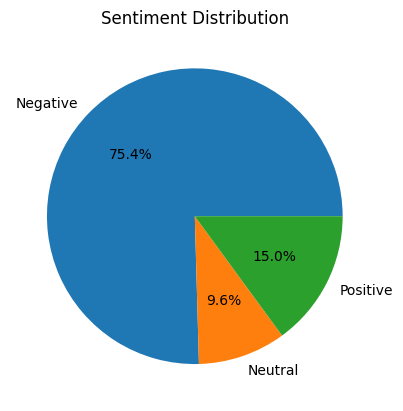

In [249]:
# pie chart for sentiment distribution
sentiment_distribution_hindi = calculate_sentiment_distribution(sentiment_scores_hindi)
plot_sentiment_distribution(sentiment_distribution_hindi)

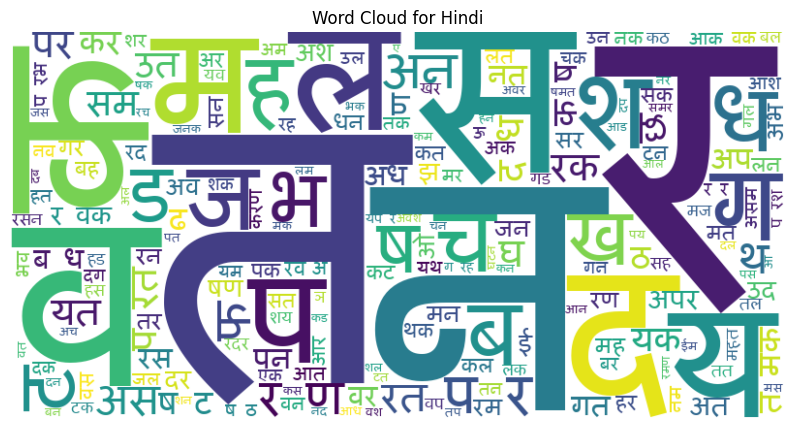

In [250]:
text_hindi = ' '.join(preprocessed_hindi_text)
font_path = '/content/Mangal Regular.ttf'
wordcloud_hindi = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text_hindi)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_hindi, interpolation='bilinear')
plt.title('Word Cloud for Hindi')
plt.axis('off')
plt.show()

In [251]:
# Sentiment Analysis for Marathi
y_marathi_pred = model_marathi.predict_proba(X_marathi_test)[:, 1]
sentiment_scores_marathi = convert_to_sentiment_scores(y_marathi_pred)

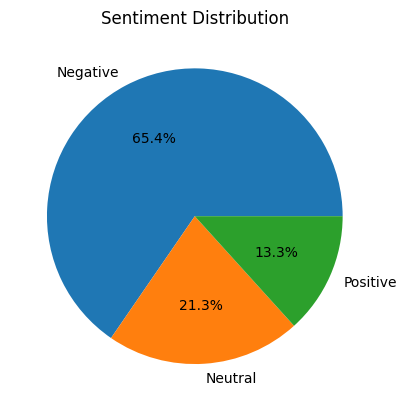

In [252]:
# pie chart for sentiment distribution in Marathi
sentiment_distribution_marathi = calculate_sentiment_distribution(sentiment_scores_marathi)
plot_sentiment_distribution(sentiment_distribution_marathi)

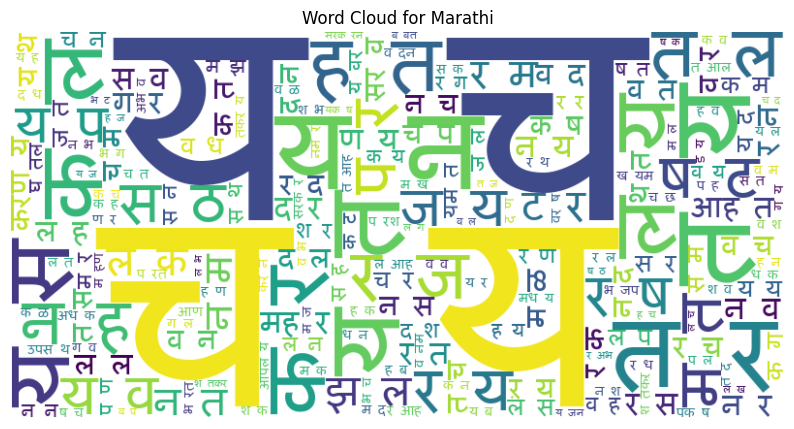

In [253]:
dataframe_marathi = pd.read_csv("/content/final_marathi_data.csv")
marathi_text = ' '.join(dataframe_marathi['Sentence'])
wordcloud_marathi = WordCloud(width=800, height=400, background_color='white', font_path='/content/Mangal Regular.ttf').generate(marathi_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_marathi, interpolation='bilinear')
plt.title('Word Cloud for Marathi')
plt.axis('off')
plt.show()

In [254]:
# sentiment labels for Punjabi test data
y_punjabi_pred = model_punjabi.predict_proba(X_punjabi_test)[:, 1]
sentiment_scores_punjabi = convert_to_sentiment_scores(y_punjabi_pred)

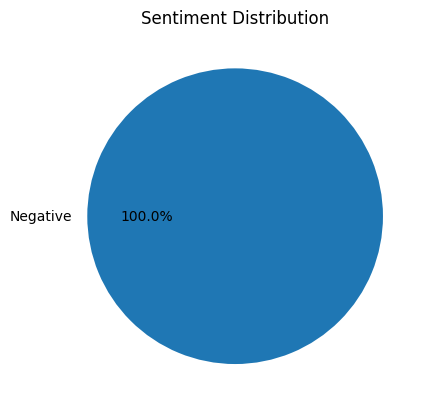

In [255]:
# pie chart for sentiment distribution in punjabi
sentiment_distribution_punjabi = calculate_sentiment_distribution(sentiment_scores_punjabi)
plot_sentiment_distribution(sentiment_distribution_punjabi)

In [256]:
# sentiment labels for gujarati test data
y_gujarati_pred = model_gujrati.predict_proba(X_gujrati_test)[:, 1]
sentiment_scores_gujarati = convert_to_sentiment_scores(y_gujarati_pred)

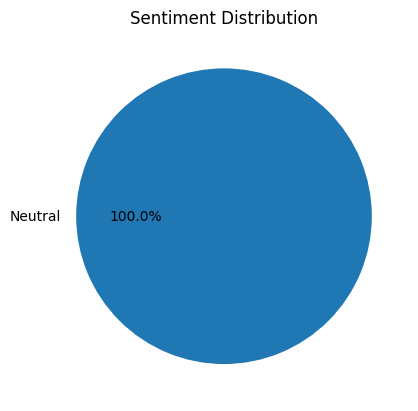

In [257]:
sentiment_distribution_gujarati = calculate_sentiment_distribution(sentiment_scores_gujarati)
plot_sentiment_distribution(sentiment_distribution_gujarati)

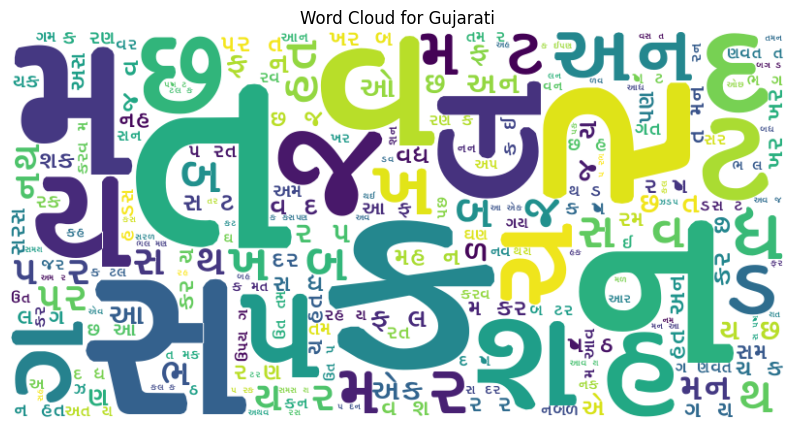

In [258]:
dataframe_gujarati = pd.read_csv("/content/gujarati_data.csv")
gujarati_text = ' '.join(dataframe_gujarati['Sentence'])
wordcloud_gujarati = WordCloud(width=800, height=400, background_color='white', font_path='/content/Aakar.ttf').generate(gujarati_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_gujarati, interpolation='bilinear')
plt.title('Word Cloud for Gujarati')
plt.axis('off')
plt.show()